## Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing Dataset

In [ ]:
fifa23 = pd.read_csv('fifa_23_main.csv')

#### Renaming Columns

In [ ]:
#Renaming column from french to english
fifa23.rename(columns = {"Nom":"Name", "Général":"Overall", "Potentiel":"Potential", "Pays":"Country", "Bon pied":"Good Foot", 
                         "Mauvais pied":"Bad Foot", "Gestes techniques":"Technical Skills", "Taille":"Height", 
                         "Rendement offensif":"Offensive Spirit", "Rendement defensif":"Defensive Spirit", "Valeur":"Value", "Salaire":"Salary",
                         "Centres":"Crosses", "Finition":"Finishing", "Precision tete":"Heading", "Passes courtes":"Short Passes", 
                         "Volee":"Voleys", "Effet":"Effect", "PCF":"Free-Kick Precision", "Passes longues":"Long Passes", 
                         "Controle":"Ball Control", "Vitesse":"Speed", "Agilite":"Agility", "Reactivite":"Reactivity", "Equilibre":"Balance", 
                         "Puissance frappe": "Shoot Power", "Detente":"Jumping", "Endurance":"Stamina", "Force":"Strength", 
                         "Tirs de loin":"Long Shoots", "Agressivite":"Agressivity", "Placement":"Offensive Positioning",
                         "Calme":"Composure", "Conscience defensive":"Defensive Consciousness", "Tacle debout":"Standing Tackle",
                         "Tacle glisse":"Sliding Tackle", "Plongeon":"GK Diving", "Jeu main":"GK Hand Game", "Jeu pied":"GK Foot Game",
                         "Placement.1":"GK Positioning", "Reflexes":"Gk Reflexes"}, inplace = True)

In [ ]:
fifa23.head()

,Name,Overall,Potential,Performance,Country,Club,Good Foot,Bad Foot,Technical Skills,Height,...,Penalty,Composure,Defensive Consciousness,Standing Tackle,Sliding Tackle,GK Diving,GK Hand Game,GK Foot Game,GK Positioning,Gk Reflexes
0,K. Mbappé,91,95,93.0,France,Paris Saint-Germain,Right,4,5,182,...,80,88,26,34,32,13,5,7,11,6
1,R. Lewandowski,91,91,91.0,Poland,FC Barcelona,Right,4,4,185,...,90,88,35,42,19,15,6,12,8,10
2,K. Benzema,91,91,91.0,France,Real Madrid CF,Right,4,4,185,...,84,90,43,24,18,13,11,5,5,7
3,L. Messi,91,91,91.0,Argentina,Paris Saint-Germain,Left,4,4,169,...,75,96,20,35,24,6,11,15,14,8
4,K. De Bruyne,91,91,91.0,Belgium,Manchester City,Right,5,4,181,...,83,89,68,65,53,15,13,5,10,13


## Checking for missing Values in columns

In [ ]:
fifa23.isna().sum() #There are no missing values in the dataset

Name                       0
Overall                    0
Potential                  0
Performance                0
Country                    0
Club                       0
Good Foot                  0
Bad Foot                   0
Technical Skills           0
Height                     0
Offensive Spirit           0
Defensive Spirit           0
Value                      0
Salary                     0
Id                         0
Crosses                    0
Finishing                  0
Heading                    0
Short Passes               0
Voleys                     0
Dribbles                   0
Effect                     0
Free-Kick Precision        0
Long Passes                0
Ball Control               0
Acceleration               0
Speed                      0
Agility                    0
Reactivity                 0
Balance                    0
Shoot Power                0
Jumping                    0
Stamina                    0
Strength                   0
Long Shoots   

## Droping unrelated Column(Feature Selection)

In [ ]:
#Name, Id, Salary, Value, Id, Country, Club, Overall, Good foot, Bad foot will not help for performance predicion
#There is already a feature Heading which will cover Height feature.Hence, dropping height from feature
fifa23 = fifa23.drop(['Name', 'Overall', 'Potential', 'Club', 'Height', 'Country', 'Good Foot', 'Good Foot', 'Salary', 'Value', 'Id'], axis=1)

In [ ]:
fifa23.head()

,Performance,Bad Foot,Technical Skills,Offensive Spirit,Defensive Spirit,Crosses,Finishing,Heading,Short Passes,Voleys,...,Penalty,Composure,Defensive Consciousness,Standing Tackle,Sliding Tackle,GK Diving,GK Hand Game,GK Foot Game,GK Positioning,Gk Reflexes
0,93.0,4,5,High,Low,78,93,72,85,83,...,80,88,26,34,32,13,5,7,11,6
1,91.0,4,4,High,Medium,71,94,91,84,89,...,90,88,35,42,19,15,6,12,8,10
2,91.0,4,4,Medium,Medium,75,92,90,89,88,...,84,90,43,24,18,13,11,5,5,7
3,91.0,4,4,Low,Low,84,90,70,91,88,...,75,96,20,35,24,6,11,15,14,8
4,91.0,5,4,High,High,94,85,55,93,83,...,83,89,68,65,53,15,13,5,10,13


## Seperating Features and target

In [ ]:
X = fifa23.iloc[:,1:-1]
y = fifa23.iloc[:, 0:1] #Performance is target

## Encoding Ordinal Column

In [ ]:
#Offensive Spirit and Defensive sipirt are ordinal columns
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(X.iloc[:, 2:4])
X.iloc[:, 2:4] = enc.transform(X.iloc[:, 2:4])

In [ ]:
X.head()

,Bad Foot,Technical Skills,Offensive Spirit,Defensive Spirit,Crosses,Finishing,Heading,Short Passes,Voleys,Dribbles,...,Vista,Penalty,Composure,Defensive Consciousness,Standing Tackle,Sliding Tackle,GK Diving,GK Hand Game,GK Foot Game,GK Positioning
0,4,5,0.0,1.0,78,93,72,85,83,93,...,83,80,88,26,34,32,13,5,7,11
1,4,4,0.0,2.0,71,94,91,84,89,85,...,81,90,88,35,42,19,15,6,12,8
2,4,4,2.0,2.0,75,92,90,89,88,87,...,89,84,90,43,24,18,13,11,5,5
3,4,4,1.0,1.0,84,90,70,91,88,95,...,94,75,96,20,35,24,6,11,15,14
4,5,4,0.0,0.0,94,85,55,93,83,88,...,94,83,89,68,65,53,15,13,5,10


## Splitting Dataset into Training and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Feature Scaling 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

#Scaling features and target 
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

#Transform test set
X_test = sc_X.transform(X_test)
y_test = sc_y.transform(y_test)

## Feature Selection

##### Rcursive Feature Elimination(RFE) cannot be used for SVR.RFE operates by fitting its estimator and then eliminating the worst feature(s), and recursing. 
##### The "worst" feature(s) are determined by using feature importance from the model, by default using either coef_ or feature_importances_

In [ ]:
# Using Variance threshold for reducing features
print("Shape of train set before applying Variance Threshold:", X_train.shape)

#Initialization of Variance threshold
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()

#Fitting and transforming the train set
X_train = selector.fit_transform(X_train)

print("Shape of train set after applying Variance Threshold:", X_train.shape)

# This didn't reduced features

Shape of train set before applying Variance Threshold: (14756, 37)
Shape of train set after applying Variance Threshold: (14756, 37)


### Applying PCA for dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 30) #After using different numbers for components, 30 was the best parameter for accuracy
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Training datasets on SVR model

### Using GridSearchCV for determining best paarmeters for model and cross validation

In [ ]:
#Initlializing model
from sklearn.svm import SVR # non-linear
regressor = SVR(kernel = 'rbf') 


from sklearn.model_selection import GridSearchCV

#Initializing different parameters that will be used in grid search 
parameters = [{'C':[1], 'kernel':['rbf'], 'gamma':['scale'], 'epsilon':[0.15,0.2,0.25,0.3]}]
'''
Before using this below parameters were used to accuracy for each kernel: 'linear','poly','rbf','sigmoid' 
{'C':[0.25, 0.5, 0.75, 1],'gamma':['scale', 'auto'], 'epsilon':[0.2,0.5,0.7,1]}
'''

grid_search = GridSearchCV(estimator=regressor, 
                           param_grid=parameters,
                           scoring='r2',  #scoring method will be R square
                           cv=10,         #ten sets for cross validation
                           n_jobs=-1)     #n_jobs=-1 will use all the available processors

#Fitting it on train set
grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:",best_parameters)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Accuracy: 87.49 %
Best Parameters: {'C': 1, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
#Testing model on test set 

#Initialization and fitting the model to train set
regressor = SVR(kernel='rbf', C=1, epsilon=0.2, gamma='scale')
regressor.fit(X_train, y_train)

#prediciton for test set
y_pred = regressor.predict(X_test)

#R sqaure for goodness of fit 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8719087736062177

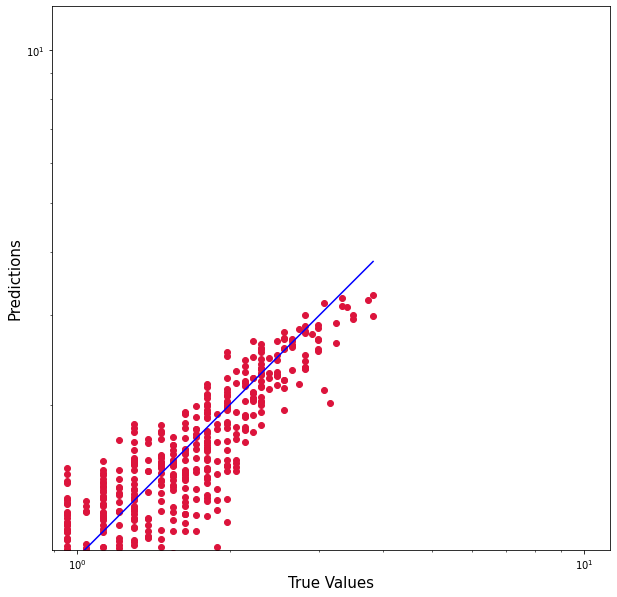

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


## Training dataset on other models

#### Multi LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

y_pred = y_pred.round(1)

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7410960318220245

#### Polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)

lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)

y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8462361683693548

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0) 

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6766732748646725

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=40, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8462361683693548

#### XGBoost

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7646182687853593